<a href="https://colab.research.google.com/github/thanavi-kaushik99/bloodtest/blob/master/Blood_Donation1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Code to read csv file into colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials


In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
#2.1 Get the file
downloaded = drive.CreateFile({'id':'1nRqWcgzaZFUrV-L3HEfP-xX1Dh-HmpUX'}) 
downloaded.GetContentFile('Warm_Up_Predict_Blood_Donations_-_Test_Data.csv')

In [0]:
#2.1 Get the file
downloaded = drive.CreateFile({'id':'1UE0w-JuW_hkObMfLd3SYlGWW32A7b8pc'}) 
downloaded.GetContentFile('Warm_Up_Predict_Blood_Donations_-_Traning_Data.csv')

In [0]:
import pandas as pd
import numpy as np

In [0]:
df_train = pd.read_csv('Warm_Up_Predict_Blood_Donations_-_Traning_Data.csv')
df_test = pd.read_csv('Warm_Up_Predict_Blood_Donations_-_Test_Data.csv')

In [0]:
print(df_train.shape)
df_train.head()

(576, 6)


,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
0,619,2,50,12500,98,1
1,664,0,13,3250,28,1
2,441,1,16,4000,35,1
3,160,2,20,5000,45,1
4,358,1,24,6000,77,0


In [0]:
from sklearn.model_selection import train_test_split

X = df_train.iloc[:, 1:5]
y = df_train[['Made Donation in March 2007']]

X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size = 0.2, random_state = 0)


df_test.head()



,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation
0,659,2,12,3000,52
1,276,21,7,1750,38
2,263,4,1,250,4
3,303,11,11,2750,38
4,83,4,12,3000,34


In [0]:
X_test = df_test.iloc[:, 1:5]

In [0]:
X_train = X_train.reset_index(drop = True)
X_cv = X_cv.reset_index(drop = True)
X_test = X_test.reset_index(drop = True)

In [0]:

X_train.isnull().sum()

Months since Last Donation     0
Number of Donations            0
Total Volume Donated (c.c.)    0
Months since First Donation    0
dtype: int64

In [0]:
X_cv.isnull().sum()



Months since Last Donation     0
Number of Donations            0
Total Volume Donated (c.c.)    0
Months since First Donation    0
dtype: int64

In [0]:
X_test.isnull().sum()

Months since Last Donation     0
Number of Donations            0
Total Volume Donated (c.c.)    0
Months since First Donation    0
dtype: int64

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


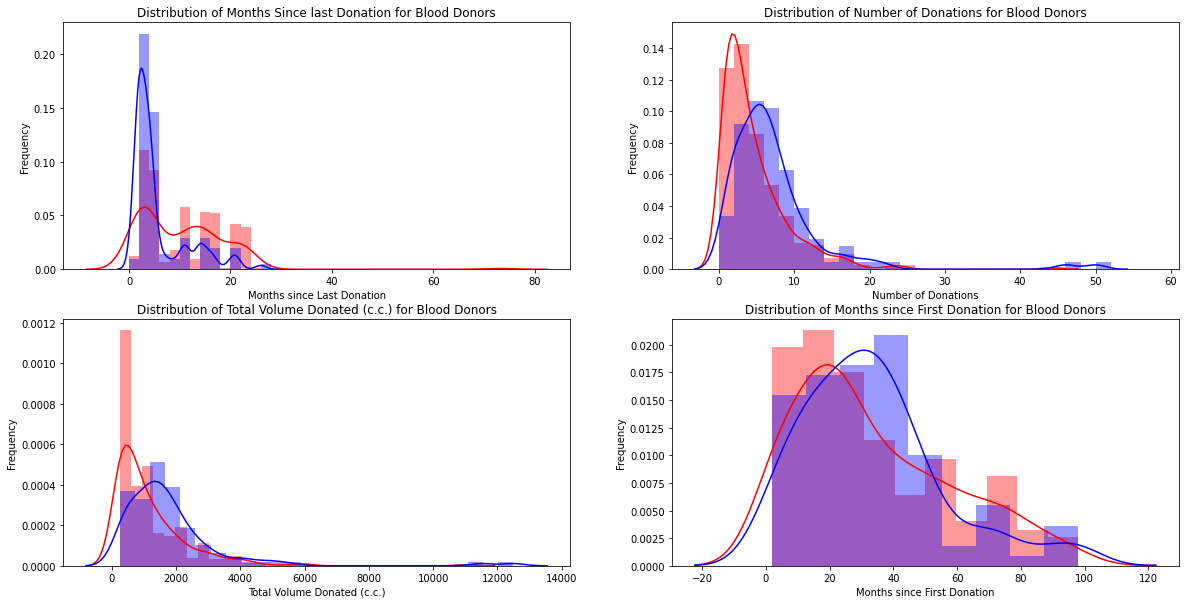

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (20, 10))
plt.subplot(2, 2, 1)
sns.distplot(X_train[y_train.values == 0]['Months since Last Donation'], 
             bins = range(0, 81, 2), color = 'red')
plt.ylabel('Frequency')
plt.title('Distribution of Months Since last Donation for Non-blood Donors')

sns.distplot(X_train[y_train.values == 1]['Months since Last Donation'], 
             bins = range(0, 81, 2), color = 'blue')
plt.ylabel('Frequency')
plt.title('Distribution of Months Since last Donation for Blood Donors')

plt.subplot(2, 2, 2)
sns.distplot(X_train[y_train.values == 0]['Number of Donations'], 
             bins = range(0, 60, 2), color = 'red')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Donations for Non-blood Donors')

sns.distplot(X_train[y_train.values == 1]['Number of Donations'], 
             bins = range(0, 60, 2), color = 'blue')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Donations for Blood Donors')

plt.subplot(2, 2, 3)
sns.distplot(X_train[y_train.values == 0]['Total Volume Donated (c.c.)'], color = 'red')
plt.ylabel('Frequency')
plt.title('Distribution of Total Volume Donated (c.c.) for Non-blood Donors')

sns.distplot(X_train[y_train.values == 1]['Total Volume Donated (c.c.)'], color = 'blue')
plt.ylabel('Frequency')
plt.title('Distribution of Total Volume Donated (c.c.) for Blood Donors')

plt.subplot(2, 2, 4)
sns.distplot(X_train[y_train.values == 0]['Months since First Donation'], color = 'red')
plt.ylabel('Frequency')
plt.title('Distribution of Months since First Donation for Non-blood Donors')

sns.distplot(X_train[y_train.values == 1]['Months since First Donation'], color = 'blue')
plt.ylabel('Frequency')
plt.title('Distribution of Months since First Donation for Blood Donors')

plt.show()



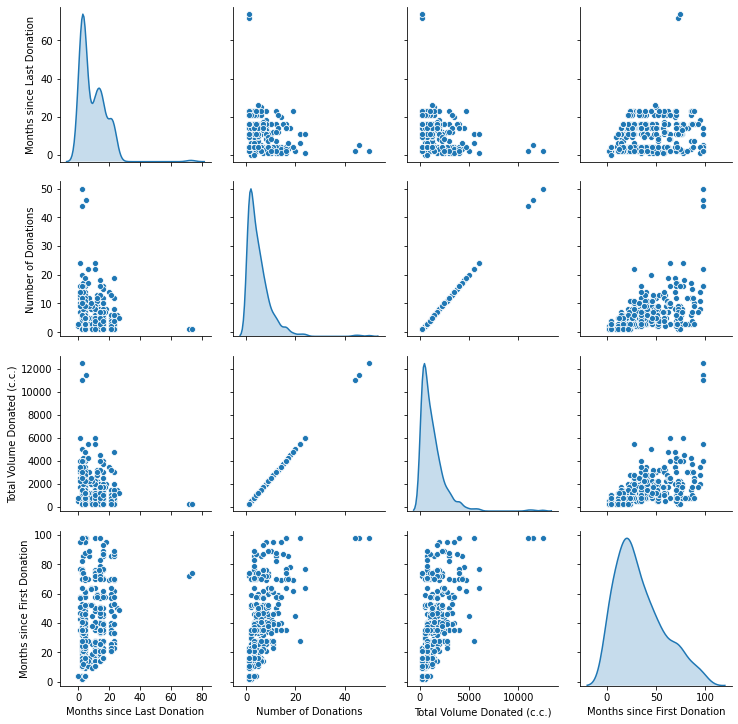

In [0]:
sns.pairplot(X_train, diag_kind='kde')
plt.show()



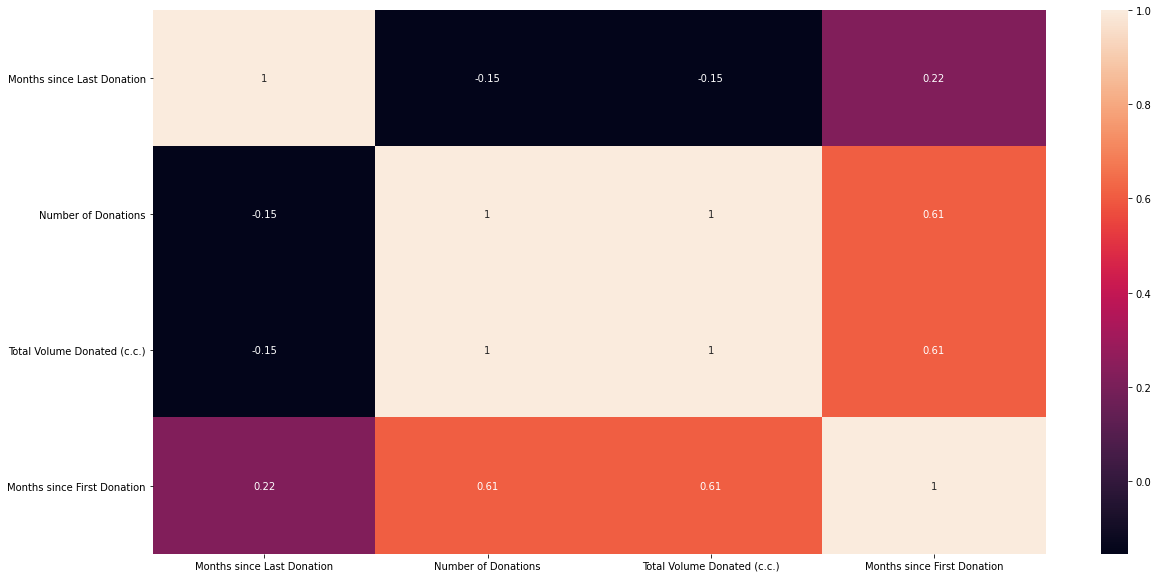

In [0]:
plt.figure(figsize = (20, 10))
X_train_corr = X_train.corr()

sns.heatmap(X_train_corr, annot = True)
plt.show()



In [0]:
print (y_train['Made Donation in March 2007'])
print (y_cv['Made Donation in March 2007'])

426    0
122    1
525    1
118    0
298    0
      ..
277    0
9      0
359    0
192    0
559    0
Name: Made Donation in March 2007, Length: 460, dtype: int64
414    1
96     1
480    0
318    0
540    0
      ..
102    0
283    0
108    0
397    1
85     0
Name: Made Donation in March 2007, Length: 116, dtype: int64


In [0]:
X_train['Average Donation per Month'] = (X_train['Total Volume Donated (c.c.)']/
                                         X_train['Months since First Donation'])

In [0]:
X_train.head()

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Average Donation per Month
0,4,4,1000,18,55.555556
1,2,1,250,2,125.000000
2,20,14,3500,69,50.724638
3,2,2,500,11,45.454545
4,11,4,1000,58,17.241379


In [0]:
X_cv['Average Donation per Month'] = X_cv['Total Volume Donated (c.c.)']/X_cv['Months since First Donation']
X_test['Average Donation per Month'] = X_test['Total Volume Donated (c.c.)']/X_test['Months since First Donation']



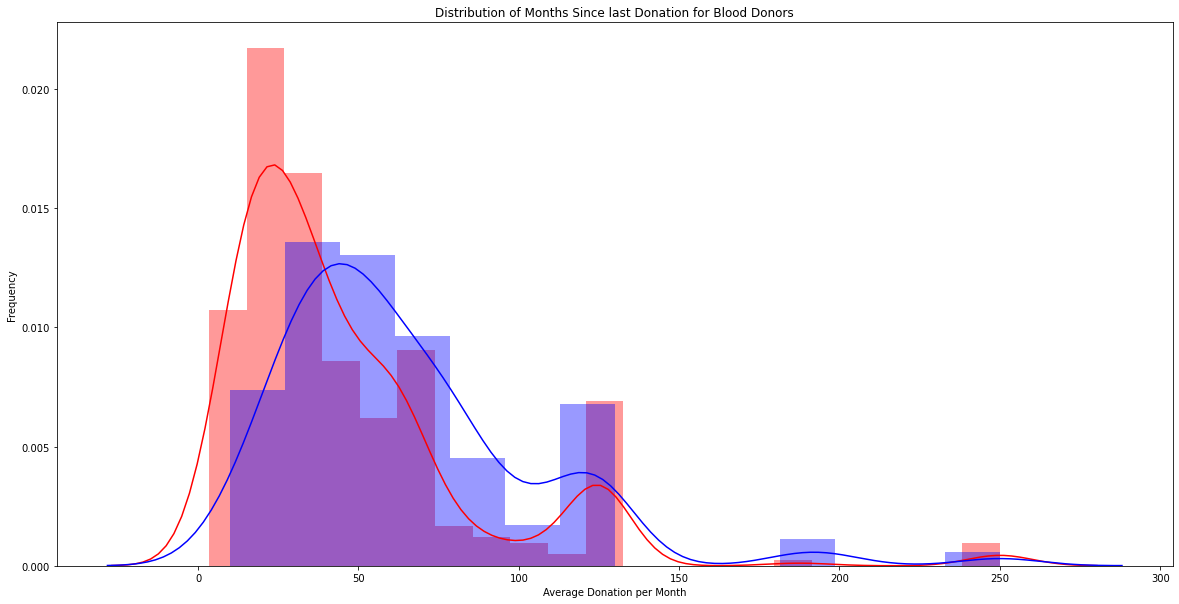

In [0]:
plt.figure(figsize = (20, 10))

sns.distplot(X_train[y_train.values == 0]['Average Donation per Month'], color = 'red')
plt.ylabel('Frequency')
plt.title('Distribution of Months Since last Donation for Non-blood Donors')

sns.distplot(X_train[y_train.values == 1]['Average Donation per Month'], color = 'blue')
plt.ylabel('Frequency')
plt.title('Distribution of Months Since last Donation for Blood Donors')

plt.show()



In [0]:
X_train['Waiting Time'] = ((X_train['Months since First Donation'] - X_train['Months since Last Donation'])
                           /X_train['Number of Donations'])

X_cv['Waiting Time'] = ((X_cv['Months since First Donation'] - X_cv['Months since Last Donation'])
                        /X_cv['Number of Donations'])

X_test['Waiting Time'] = ((X_test['Months since First Donation'] - X_test['Months since Last Donation'])
                          /X_test['Number of Donations'])

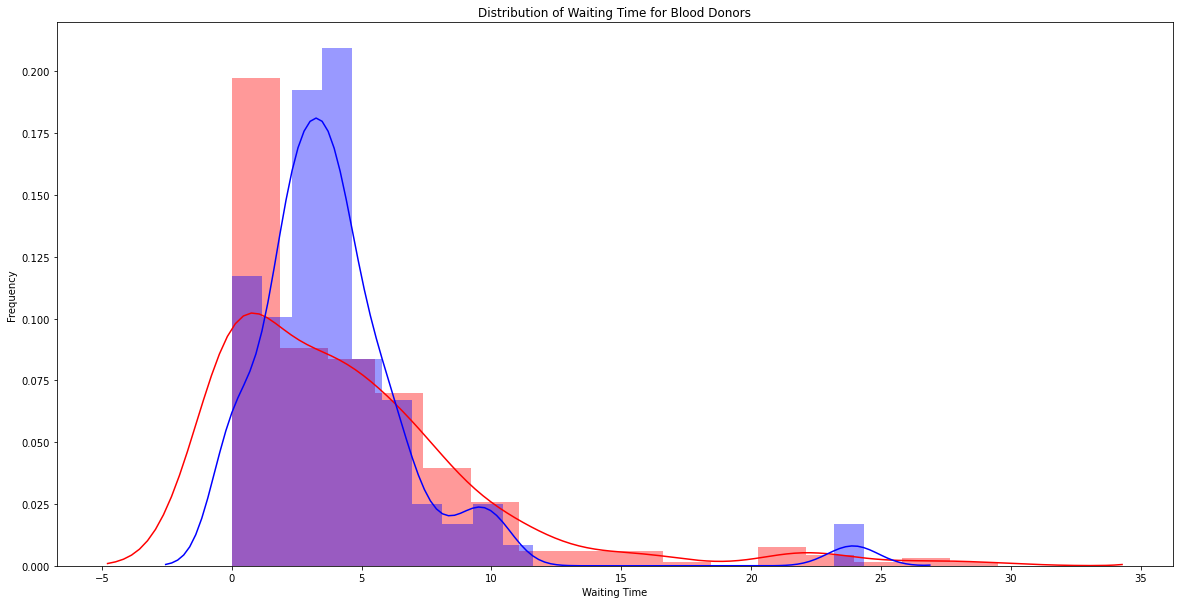

In [0]:
plt.figure(figsize = (20, 10))

sns.distplot(X_train[y_train.values == 0]['Waiting Time'], color = 'red')
plt.ylabel('Frequency')
plt.title('Distribution of Waiting Time for Non-blood Donors')

sns.distplot(X_train[y_train.values == 1]['Waiting Time'], color = 'blue')
plt.ylabel('Frequency')
plt.title('Distribution of Waiting Time for Blood Donors')

plt.show()

In [0]:
X_train['One-time Donor'] = map(int, (X_train['Number of Donations'] == 1))
tab = pd.crosstab(X_train['One-time Donor'], y_train['Made Donation in March 2007'])

tab.div(tab.sum(1).astype(float), axis=0)

Made Donation in March 2007,0,1
One-time Donor,,
<map object at 0x7f2844a19e48>,0.739247,0.260753


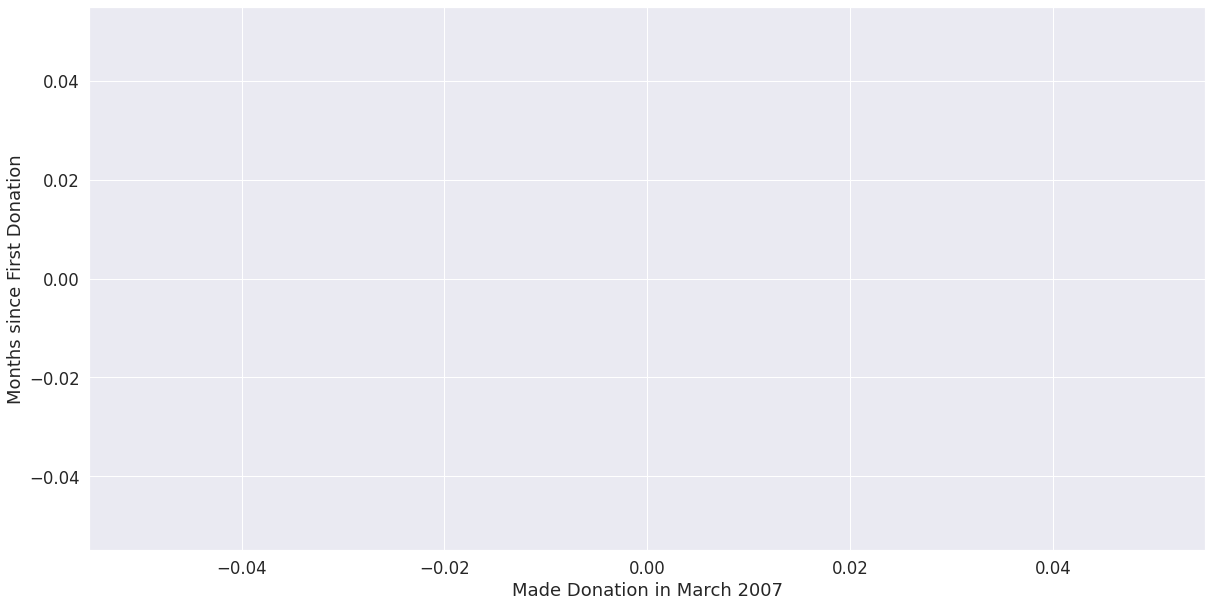

In [0]:
plt.figure(figsize = (20, 10))
sns.regplot(x = y_train.reset_index(drop = True)[X_train['One-time Donor'] == 1],
            y = X_train[X_train['One-time Donor'] == 1]['Months since First Donation']) 

plt.show()

In [0]:
del X_train['One-time Donor']



In [0]:
X_train['Donated in the past 3-6 months'] = ((X_train['Months since Last Donation'] >= 3) &
                                             (X_train['Months since Last Donation'] <= 6))

X_cv['Donated in the past 3-6 months'] = ((X_cv['Months since Last Donation'] >= 3) &
                                          (X_cv['Months since Last Donation'] <= 6))

X_test['Donated in the past 3-6 months'] = ((X_test['Months since Last Donation'] >= 3) &
                                            (X_test['Months since Last Donation'] <= 6))

In [0]:
X_train['Frequent Donor'] = (X_train['Number of Donations'] >= 5)

X_cv['Frequent Donor'] = (X_cv['Number of Donations'] >= 5)

X_test['Frequent Donor'] = (X_test['Number of Donations'] >= 5)



In [0]:
cols_to_keep = ['Months since Last Donation', 'Number of Donations',
                'Months since First Donation', 'Average Donation per Month', 
                'Waiting Time', 'Donated in the past 3-6 months', 'Frequent Donor']
X_train = X_train[cols_to_keep]; X_cv = X_cv[cols_to_keep]; X_test = X_test[cols_to_keep]

In [0]:
X_train.head()



,Months since Last Donation,Number of Donations,Months since First Donation,Average Donation per Month,Waiting Time,Donated in the past 3-6 months,Frequent Donor
0,4,4,18,55.555556,3.50,True,False
1,2,1,2,125.000000,0.00,False,False
2,20,14,69,50.724638,3.50,False,True
3,2,2,11,45.454545,4.50,False,False
4,11,4,58,17.241379,11.75,False,False


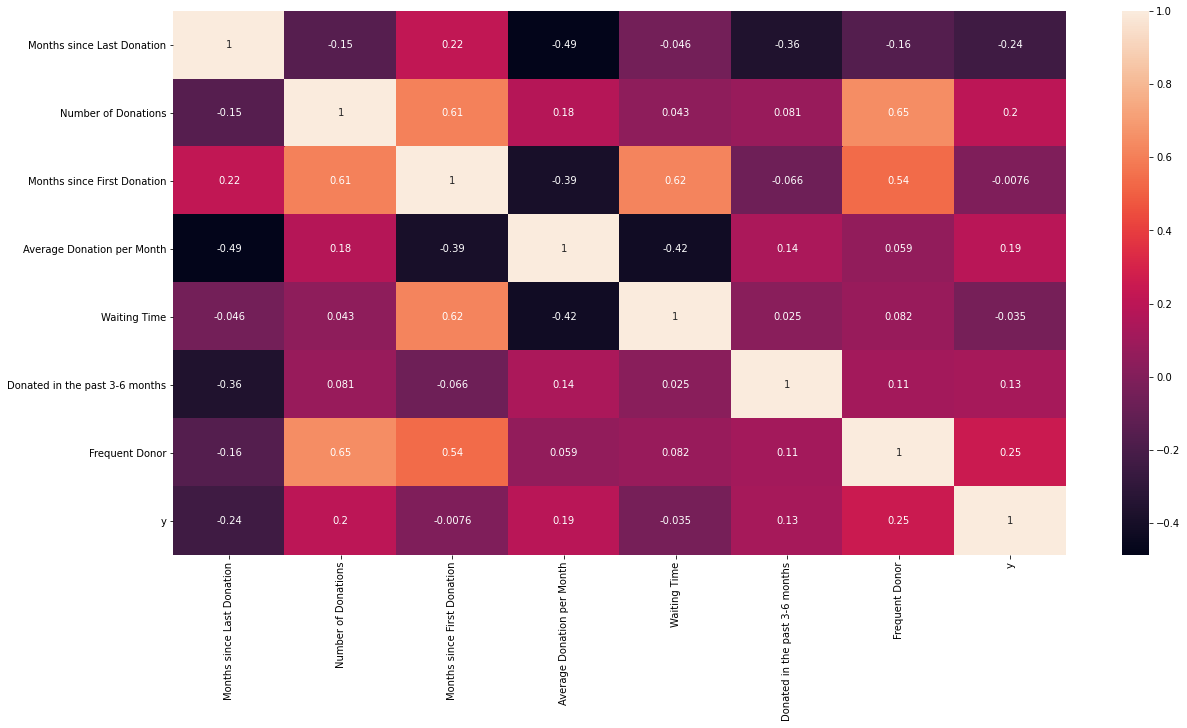

In [0]:
plt.figure(figsize = (20, 10))
train_ = X_train.copy(); train_['y'] = y_train.reset_index(drop = True)
train_corr = train_.corr()

sns.heatmap(train_corr, annot = True)
plt.show()

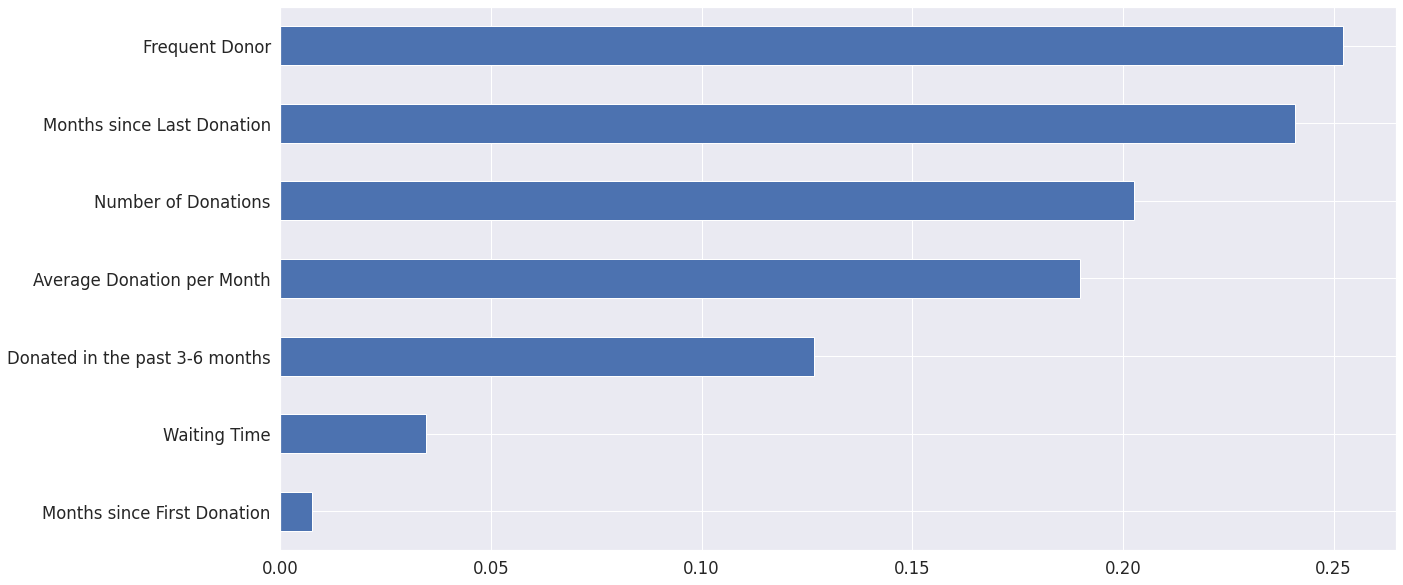

In [0]:
plt.figure(figsize = (20, 10))
sns.set(font_scale = 1.5)
(abs(train_corr)
 .y
 .drop('y')
 .sort_values()
 .plot
 .barh())
plt.show()



In [0]:
from sklearn.linear_model import LogisticRegressionCV # Logistic Regression
from sklearn.ensemble import RandomForestClassifier # Random Forest
from sklearn.ensemble import AdaBoostClassifier # Gradient Boosting (AdaBoost)
from sklearn.svm import SVC # Support Vector Machine

In [0]:
from sklearn.model_selection import GridSearchCV

In [0]:
from sklearn.preprocessing import StandardScaler

numericFeatures = ['Months since Last Donation', 'Number of Donations', 
                   'Average Donation per Month', 'Waiting Time', 'Months since First Donation']
scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train[numericFeatures]))
X_cv_scaled = pd.DataFrame(scaler.transform(X_cv[numericFeatures]))
X_test_scaled = pd.DataFrame(scaler.transform(X_test[numericFeatures]))



In [0]:
from sklearn.preprocessing import LabelEncoder

factorVar = ['Frequent Donor', 'Donated in the past 3-6 months']

le = LabelEncoder()

for i in factorVar:
    X_train_scaled[i] = le.fit_transform(X_train[i])
    X_cv_scaled[i] = le.transform(X_cv[i])
    X_test_scaled[i] = le.transform(X_test[i])

In [0]:
# Model 1 - Logistic Regression
from sklearn.linear_model import LogisticRegressionCV

logregr = LogisticRegressionCV(cv = 5, random_state=12, scoring ='neg_log_loss')
logregr = logregr.fit(X_train_scaled, y_train['Made Donation in March 2007'])

y_cv_logregr = logregr.predict_proba(X_cv_scaled)[:, 1]

In [0]:
# Model 2 - RandomForest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

randomforest = RandomForestClassifier(random_state = 10)
param_grid = {'n_estimators': [50, 100, 150],
              'max_features': [1, 2, 3]}
rf = GridSearchCV(estimator = randomforest, param_grid = param_grid, cv = 5,
                  scoring = 'neg_log_loss')
rf.fit(X_train_scaled, y_train['Made Donation in March 2007'])

y_cv_rf = rf.predict_proba(X_cv_scaled)[:, 1]

In [0]:
# Model 3 - AdaBoost
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

abc = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth = 1),
                         random_state = 10)
param_grid = {'n_estimators': [50, 100, 150],
              'algorithm': ['SAMME', 'SAMME.R']}
abc = GridSearchCV(abc, param_grid = param_grid, cv = 5,
                   scoring = 'neg_log_loss')

abc.fit(X_train_scaled, y_train['Made Donation in March 2007'])

y_cv_abc = abc.predict_proba(X_cv_scaled)[:, 1]

In [0]:
# Model 4 - Support Vector Machine
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svm = SVC(probability = True)
param_grid = {'kernel': ['rbf', 'linear'],
              'gamma': np.logspace(-4, 1, 10),
              'random_state': [10]}
svm = GridSearchCV(svm, param_grid = param_grid, cv = 5,
                   scoring = 'neg_log_loss')

svm.fit(X_train_scaled, y_train['Made Donation in March 2007'])

y_cv_svm = svm.predict_proba(X_cv_scaled)[:, 1]

In [0]:
from sklearn.metrics import log_loss

In [0]:
from sklearn.metrics import log_loss

# Logistic Regression
print ('Logistic Regression - Entropy Loss:', log_loss(y_cv, y_cv_logregr))

# Random Forest
print ('Random Forest - Entropy Loss: ', log_loss(y_cv, y_cv_rf))

# AdaBoost
print ('Gradient Boosting - Entropy Loss: ', log_loss(y_cv, y_cv_abc))

# Support Vector Machine
print ('Support Vector Machine - Entropy Loss: ', log_loss(y_cv, y_cv_svm))



Logistic Regression - Entropy Loss: 0.5394600379192194
Random Forest - Entropy Loss:  1.9741593268831445
Gradient Boosting - Entropy Loss:  0.6260526577291643
Support Vector Machine - Entropy Loss:  0.5849439213335899


In [0]:
logregr

LogisticRegressionCV(Cs=10, class_weight=None, cv=5, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='auto', n_jobs=None,
                     penalty='l2', random_state=12, refit=True,
                     scoring='neg_log_loss', solver='lbfgs', tol=0.0001,
                     verbose=0)

In [0]:
X_total = pd.concat([pd.DataFrame(X_train_scaled), pd.DataFrame(X_cv_scaled)])
y_total = pd.concat([y_train, y_cv]).values

final_model = logregr.fit(X_total, y_total)
y_test = final_model.predict_proba(X_test_scaled)[:, 1]

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
print (y_test.mean(), df_train['Made Donation in March 2007'].values.mean())

0.2390494238069747 0.23958333333333334


In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
randomforest=RandomForestClassifier()

In [0]:
randomforest.fit(X_train_scaled, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [0]:
x_train,x_test,y_train,y_test=train_test_split(df_train,y,test_size=0.20,random_state=7)
print (x_train)

     Unnamed: 0  ...  Made Donation in March 2007
300         206  ...                            0
344         538  ...                            0
244         581  ...                            0
419         255  ...                            0
248         626  ...                            1
..          ...  ...                          ...
211          71  ...                            0
502         504  ...                            0
537          95  ...                            0
196         519  ...                            0
175         415  ...                            1

[460 rows x 6 columns]


In [0]:
from sklearn.svm import SVC
ml=SVC(kernel="linear", C=0.1)
ml.fit(x_train,y_train)
y_test

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Made Donation in March 2007
543,0
326,0
275,0
101,0
60,1
...,...
52,1
89,0
491,0
65,0


In [0]:
y_pred_lsvc=ml.predict(x_test)

In [0]:
from numpy import round
score_lsvc = round(accuracy_score(y_pred_lsvc,y_test)*100,2)
print("The accuracy score of Linear SVM is " ,score_lsvc, "%")

The accuracy score of Linear SVM is  100.0 %


In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
randomforest=RandomForestClassifier()

In [0]:
randomforest.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
ss=randomforest.predict(x_test)

In [0]:
from numpy import round
score_randomforest = round(accuracy_score(ss,y_test)*100,2)
print("The accuracy score of Random Forest is " ,score_randomforest, "%")

The accuracy score of Random Forest is  100.0 %


In [0]:
#using logistic regression
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()
lr.fit(x_train,y_train)
y_pred_lr = lr.predict(x_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
from numpy import round
score_lr = round(accuracy_score(y_pred_lr,y_test)*100,2)
print("The accuracy score of Logistic Regression is " ,score_lr, "%")

The accuracy score of Logistic Regression is  100.0 %


In [0]:
from sklearn.metrics import confusion_matrix,roc_curve,auc

In [0]:
confusion_matrix(ss,y_test)

array([[92,  0],
       [ 0, 24]])

In [0]:
fpr, tpr, thresholds = roc_curve(y_test, ss)
#calculating the false positive rate
fpr

array([0., 0., 1.])

In [0]:
#calculating the true positive rate
tpr

array([0., 1., 1.])

In [0]:
#calculating the thresholds
thresholds

array([2, 1, 0])

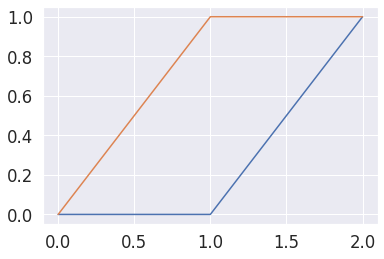

In [0]:
#plotting the false positive rate and true positive rate in 2D graph
plt.plot(fpr)
plt.plot(tpr)

In [0]:
#calculating area_curve of fpr and tpr
area_curve=auc(fpr,tpr)

In [0]:
area_curve

1.0

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
#2.1 Get the file
downloaded = drive.CreateFile({'id':'1B_gvzM-d6pxIAPule_UZLpX1OAEJ40Pq'}) 
downloaded.GetContentFile('Warm_Up_Predict_Blood_Donations_-_Submission_Format.csv')

In [0]:
submission = pd.read_csv('Warm_Up_Predict_Blood_Donations_-_Submission_Format.csv', index_col = 0)
submission['Made Donation in March 2007'] = y_test

In [0]:
submission.to_csv('test_submission.csv')